In [1]:
import pandas as pd
import geopandas as gpd
import os

In [2]:
from matplotlib import pyplot as plt

In [27]:
from matplotlib.colors import LinearSegmentedColormap

In [9]:
import math

In [3]:
os.chdir('c:\\Users\\rgarcia\\Documents\\data\\Mapas_Boulos_Nunes_Tabata')
os.listdir()

['boulos_plot.png',
 'leiame_ votacao_candidato_munzona_2016_SP.pdf',
 'LEIAME_votacao_candidato_munzona_2016_SP.pdf',
 'mapa_boulos_tabata_nunes.svg',
 'mapa_geral.geojson',
 'nunes_plot.png',
 'perfil_eleitor_secao_2016_SP.csv',
 'perfil_eleitor_secao_2022_SP.csv',
 'tabata_plot.png',
 'votacao_candidato_munzona_2016_SP.csv',
 'votacao_candidato_munzona_2022_SP.csv',
 'zonas_eleitorais_Sao_Paulo_SP.geojson']

In [4]:
# Prepara o mapa de zonas eleitorais de São Paulo-SP

zonas = gpd.read_file('zonas_eleitorais_Sao_Paulo_SP.geojson')
zonas_mapa = gpd.read_file('zonas_eleitorais_Sao_Paulo_SP.geojson')
zonas_mapa = zonas_mapa.rename(columns={'Zona':'NR_ZONA', 'Nome':'DS_ZONA'})

In [5]:
# ~1 minute run

# Prepara o dataset de perfil do eleitorado na cidade em 2016

eleitorado_2016 = pd.read_csv('perfil_eleitor_secao_2016_SP.csv', sep=';', encoding='latin1')
eleitorado_2016 = eleitorado_2016[eleitorado_2016.CD_MUNICIPIO == 71072].copy()
eleitorado_2016 = eleitorado_2016.groupby('NR_ZONA').QT_ELEITORES_PERFIL.sum().reset_index().copy()

In [6]:
# Puxa votação nominal de candidatos em 2016

total_2016 = pd.read_csv('votacao_candidato_munzona_2016_SP.csv', sep=';', encoding='latin1')

recorte_2016 = total_2016[['NR_TURNO', 'SG_UF', 'CD_MUNICIPIO', 'NR_ZONA', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'DS_SITUACAO_CANDIDATURA', 'SG_PARTIDO', 'DS_SIT_TOT_TURNO',
       'QT_VOTOS_NOMINAIS']].copy()

In [7]:
# Puxa votos do Ricardo Nunes em 2016

nunes_2016 = recorte_2016[recorte_2016.NM_CANDIDATO == 'RICARDO LUIS REIS NUNES'].copy()
nunes_2016 = nunes_2016.groupby(['NR_ZONA']).QT_VOTOS_NOMINAIS.sum().reset_index().copy()
nunes_2016 = nunes_2016.merge(eleitorado_2016, how='outer', on='NR_ZONA').copy()
nunes_2016['VOTOS_P_100K'] = ((nunes_2016.QT_VOTOS_NOMINAIS / nunes_2016.QT_ELEITORES_PERFIL) * 100000).round(1)

In [ ]:
# Cria mapa da votação do Ricardo Nunes (por 100 mil eleitores)

nunes_mapa = zonas_mapa.merge(nunes_2016, how='outer', on='NR_ZONA').copy()
nunes_mapa['VOTOS_P_100K_log10'] = nunes_mapa.VOTOS_P_100K.apply(math.log10)
nunes_mapa['Latitude'] = nunes_mapa.geometry.centroid.y
nunes_mapa['Longitude'] = nunes_mapa.geometry.centroid.x

In [ ]:
# AGORA TABATA E BOULOS

In [11]:
# ~1 minute run

# Prepara o dataset de perfil do eleitorado na cidade em 2022

eleitorado_2022 = pd.read_csv('perfil_eleitor_secao_2022_SP.csv', sep=';', encoding='latin1')
eleitorado_2022 = eleitorado_2022[eleitorado_2022.CD_MUNICIPIO == 71072].copy()
eleitorado_2022 = eleitorado_2022.groupby('NR_ZONA').QT_ELEITORES_PERFIL.sum().reset_index().copy()

In [12]:
total_2022 = pd.read_csv('votacao_candidato_munzona_2022_SP.csv', sep=';', encoding='latin1')

recorte_2022 = total_2022[['NR_TURNO', 'SG_UF', 'CD_MUNICIPIO', 'NR_ZONA', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'DS_SITUACAO_CANDIDATURA', 'SG_PARTIDO', 'DS_SIT_TOT_TURNO',
       'QT_VOTOS_NOMINAIS']].copy()

recorte_2022 = recorte_2022[recorte_2022['CD_MUNICIPIO'] == 71072]

In [14]:
# Puxa votos da Tabata em 2022

tabata_2022 = recorte_2022[recorte_2022.NM_CANDIDATO == 'TABATA CLAUDIA AMARAL DE PONTES'].copy()
tabata_2022 = tabata_2022.groupby(['NR_ZONA']).QT_VOTOS_NOMINAIS.sum().reset_index().copy()
tabata_2022 = tabata_2022.merge(eleitorado_2022, how='outer', on='NR_ZONA').copy()
tabata_2022['VOTOS_P_100K'] = ((tabata_2022.QT_VOTOS_NOMINAIS / tabata_2022.QT_ELEITORES_PERFIL) * 100000).round(1)

In [15]:
# Cria mapa da votação da Tabata Amaral (por 100 mil eleitores)

tabata_mapa = zonas_mapa.merge(tabata_2022, how='outer', on='NR_ZONA').copy()
tabata_mapa['VOTOS_P_100K_log10'] = tabata_mapa.VOTOS_P_100K.apply(math.log10)
tabata_mapa['Latitude'] = tabata_mapa.geometry.centroid.y
tabata_mapa['Longitude'] = tabata_mapa.geometry.centroid.x

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_8472\2151385149.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tabata_mapa['Latitude'] = tabata_mapa.geometry.centroid.y
C:\Users\rgarcia\AppData\Local\Temp\ipykernel_8472\2151385149.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tabata_mapa['Longitude'] = tabata_mapa.geometry.centroid.x


In [16]:
# Puxa votos de Guilherme Boulos na capital em 2022

boulos_2022 = recorte_2022[recorte_2022.NM_CANDIDATO == 'GUILHERME CASTRO BOULOS'].copy()
boulos_2022 = boulos_2022.groupby(['NR_ZONA']).QT_VOTOS_NOMINAIS.sum().reset_index().copy()
boulos_2022 = boulos_2022.merge(eleitorado_2022, how='outer', on='NR_ZONA').copy()
boulos_2022['VOTOS_P_100K'] = ((boulos_2022.QT_VOTOS_NOMINAIS / boulos_2022.QT_ELEITORES_PERFIL) * 100000).round(1)

In [17]:
# Cria mapa da votação de Guilheme Boulos (por 100 mil eleitores)

boulos_mapa = zonas_mapa.merge(boulos_2022, how='outer', on='NR_ZONA').copy()
boulos_mapa['VOTOS_P_100K_log10'] = boulos_mapa.VOTOS_P_100K.apply(math.log10)
boulos_mapa['Latitude'] = boulos_mapa.geometry.centroid.y
boulos_mapa['Longitude'] = boulos_mapa.geometry.centroid.x

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_8472\3667917419.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  boulos_mapa['Latitude'] = boulos_mapa.geometry.centroid.y
C:\Users\rgarcia\AppData\Local\Temp\ipykernel_8472\3667917419.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  boulos_mapa['Longitude'] = boulos_mapa.geometry.centroid.x


In [18]:
tabata_mapa['centroid'] = tabata_mapa.geometry.centroid
nunes_mapa['centroid'] = nunes_mapa.geometry.centroid
boulos_mapa['centroid'] = boulos_mapa.geometry.centroid

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_8472\3543540601.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tabata_mapa['centroid'] = tabata_mapa.geometry.centroid
C:\Users\rgarcia\AppData\Local\Temp\ipykernel_8472\3543540601.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nunes_mapa['centroid'] = nunes_mapa.geometry.centroid
C:\Users\rgarcia\AppData\Local\Temp\ipykernel_8472\3543540601.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  boulos_mapa['centroid'] = boulos_mapa.geometry.centroid


<AxesSubplot: >

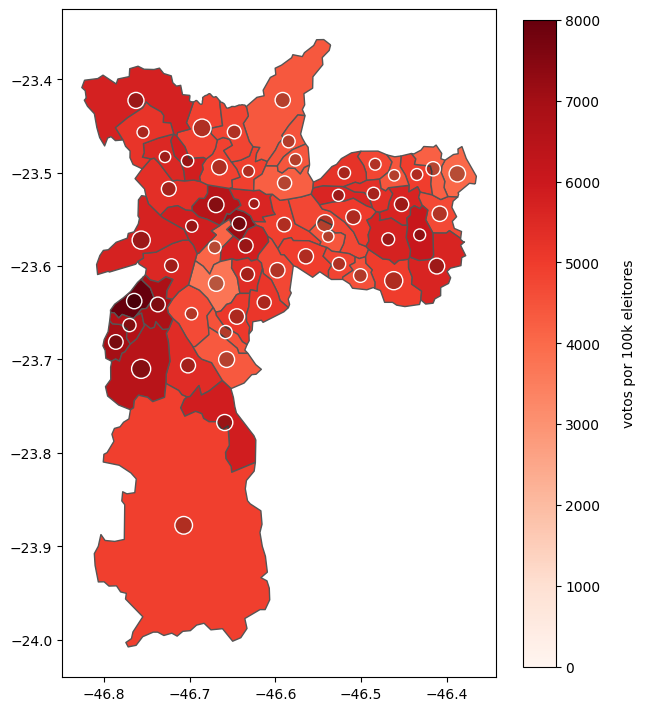

In [19]:
boulos_mapa.set_geometry("centroid").\
plot(ax=boulos_mapa.plot('VOTOS_P_100K', cmap='Reds', figsize=(7,14), legend=True, edgecolor='#555555', vmin=0, vmax=8000,
                   legend_kwds={'shrink': 0.6, 'label':'\nvotos por 100k eleitores'}), vmin=0, vmax=8000, 
     markersize=tabata_mapa['QT_ELEITORES_PERFIL']/1500, color='#00000044', edgecolors='#ffffff',
     figsize=(7,14), legend=True, linewidth=1)

<AxesSubplot: >

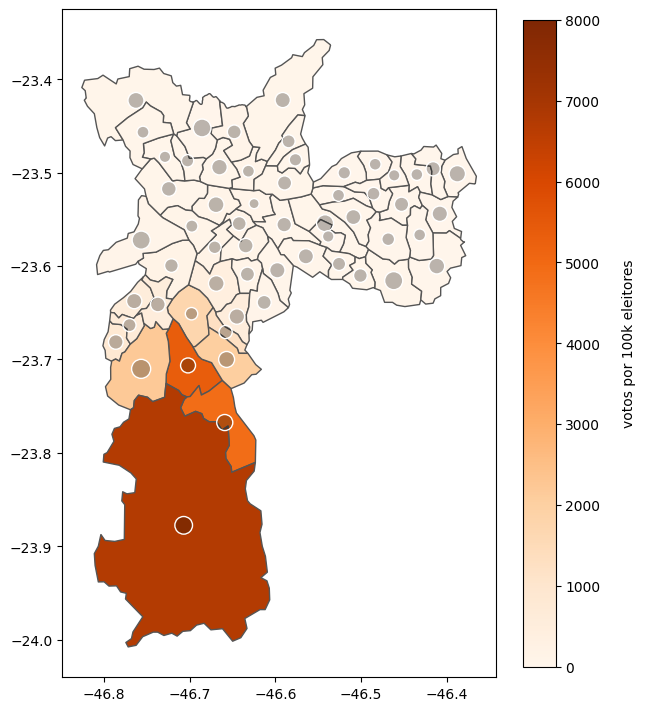

In [20]:
nunes_mapa.set_geometry("centroid").\
plot(ax=nunes_mapa.plot('VOTOS_P_100K', cmap='Oranges', figsize=(7,14), legend=True, edgecolor='#555555', vmin=0, vmax=8000,
                   legend_kwds={'shrink': 0.6, 'label':'\nvotos por 100k eleitores'}), vmin=0, vmax=8000, 
     markersize=tabata_mapa['QT_ELEITORES_PERFIL']/1500, color='#00000044', edgecolors='#ffffff',
     figsize=(7,14), legend=True, linewidth=1)

<AxesSubplot: >

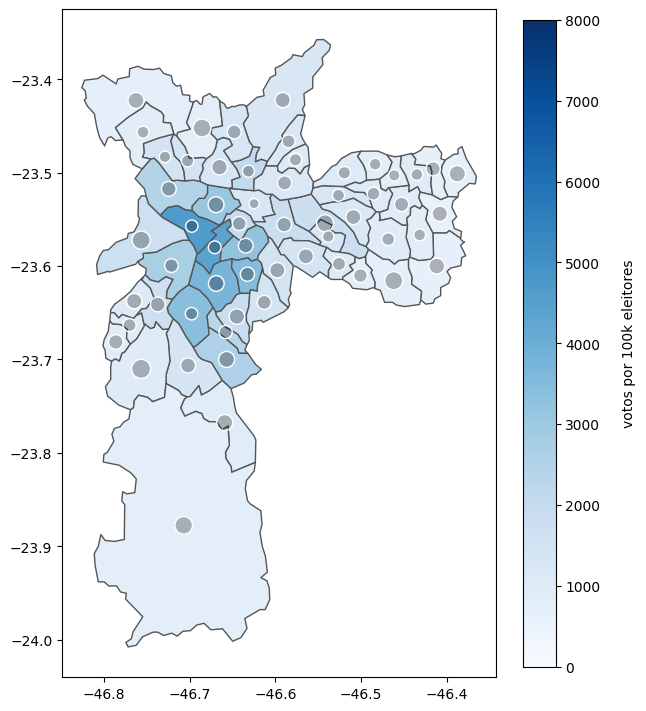

In [21]:
tabata_mapa.set_geometry("centroid").\
plot(ax=tabata_mapa.plot('VOTOS_P_100K', cmap='Blues', figsize=(7,14), legend=True, edgecolor='#555555', vmin=0, vmax=8000,
                   legend_kwds={'shrink': 0.6, 'label':'\nvotos por 100k eleitores'}), vmin=0, vmax=8000, 
     markersize=tabata_mapa['QT_ELEITORES_PERFIL']/1500, color='#00000044', edgecolors='#ffffff',
     figsize=(7,14), legend=True, linewidth=1)

In [31]:

# O GLOBO special diverging colormaps

ogl_blue = LinearSegmentedColormap.from_list('custom_diverging', ['#ffffff', '#3395ea', '#0f2d46'], N=256)
ogl_red = LinearSegmentedColormap.from_list('custom_diverging', ['#ffffff', '#fc4f71', '#4c1822'], N=256)
ogl_yellow = LinearSegmentedColormap.from_list('custom_diverging', ['#ffffff', '#f1cf00', '#483e00'], N=256)

In [32]:
# AGORA AGRUPA TODOS OS MAPAS EM UM SÓ MULTIPLOT

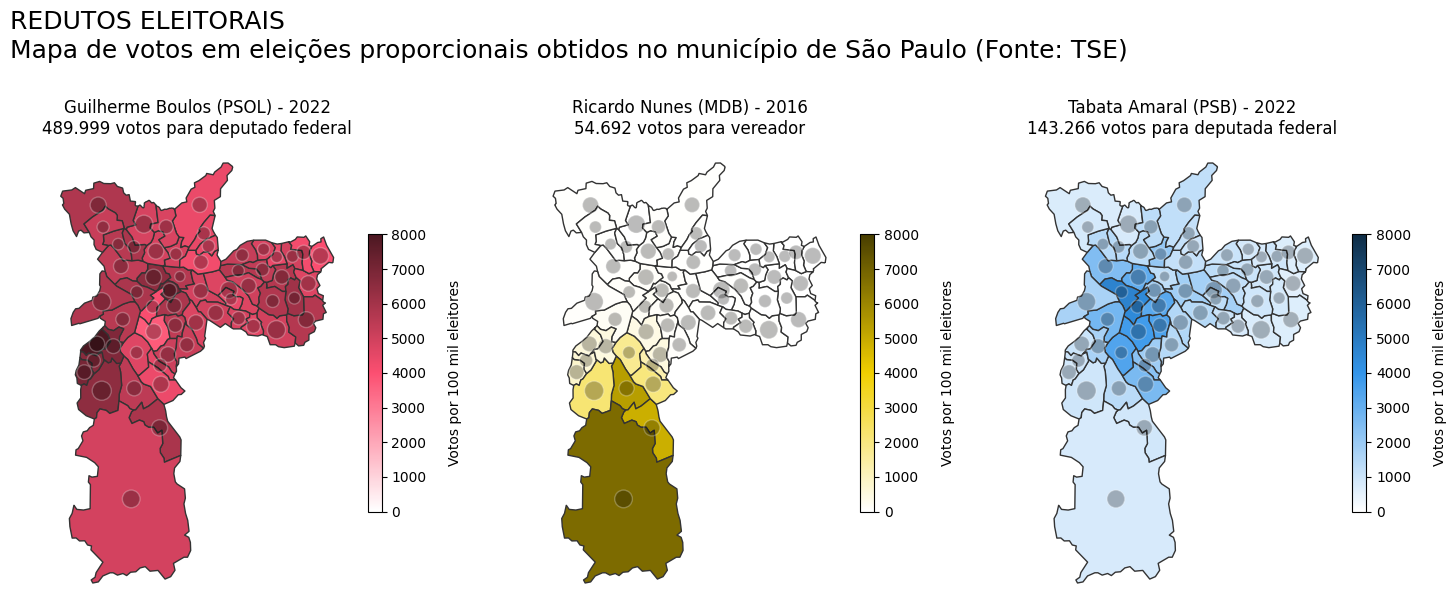

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18,6))  # 1 row, 3 columns

tabata_mapa.set_geometry("centroid").\
plot(ax=tabata_mapa.plot('VOTOS_P_100K', ax=axs[2], cmap=ogl_blue, figsize=(7,14), legend=True, edgecolor='#333333', vmin=0, vmax=8000,
                   legend_kwds={'shrink': 0.6, 'label':'\nVotos por 100 mil eleitores'}), vmin=0, vmax=8000, 
     markersize=tabata_mapa['QT_ELEITORES_PERFIL']/1500, color='#00000044', edgecolors='#ffffff44',
     figsize=(7,14), legend=True, linewidth=1)

plt.axis('off')

boulos_mapa.set_geometry("centroid").\
plot(ax=boulos_mapa.plot('VOTOS_P_100K', ax=axs[0], cmap=ogl_red, figsize=(7,14), legend=True,
                        edgecolor='#333333', vmin=0, vmax=8000,
                        legend_kwds={'shrink': 0.6, 'label':'\nVotos por 100 mil eleitores'}), vmin=0, vmax=8000, 
     markersize=tabata_mapa['QT_ELEITORES_PERFIL']/1500, color='#00000044', edgecolors='#ffffff44',
     figsize=(7,14), legend=True, linewidth=1)

plt.axis('off')

nunes_mapa.set_geometry("centroid").\
plot(ax=nunes_mapa.plot('VOTOS_P_100K', ax=axs[1], cmap=ogl_yellow, figsize=(7,14), legend=True, edgecolor='#333333', vmin=0, vmax=8000,
                   legend_kwds={'shrink': 0.6, 'label':'\nVotos por 100 mil eleitores'}), vmin=0, vmax=8000, 
     markersize=tabata_mapa['QT_ELEITORES_PERFIL']/1500, color='#00000044', edgecolors='#ffffff44',
     figsize=(7,14), legend=True, linewidth=1)

axs[0].set_title('Guilherme Boulos (PSOL) - 2022\n489.999 votos para deputado federal')
axs[1].set_title('Ricardo Nunes (MDB) - 2016\n54.692 votos para vereador')
axs[2].set_title('Tabata Amaral (PSB) - 2022\n143.266 votos para deputada federal')

axs[0].set_axis_off()
axs[1].set_axis_off()
axs[2].set_axis_off()

fig.suptitle('REDUTOS ELEITORAIS\nMapa de votos em eleições proporcionais obtidos no município de São Paulo (Fonte: TSE)', size=18, va='top',  y=1.1, x=0.12, ha='left')

plt.show()

In [38]:
os.getcwd()

'c:\\Users\\rgarcia\\Documents\\data\\Mapas_Boulos_Nunes_Tabata'

In [39]:
fig.savefig('Boulos_Nunes_Tabata_mapa.svg')

In [ ]:
# Agora prepara o mapa para o Flourish

In [45]:
flourish_base = boulos_mapa[['NR_ZONA', 'DS_ZONA', 'geometry', 'Latitude', 'Longitude', 'QT_ELEITORES_PERFIL', 'QT_VOTOS_NOMINAIS', 'VOTOS_P_100K']].copy()

In [54]:
flourish_base = flourish_base.rename(columns={'QT_ELEITORES_PERFIL':'ELEITORADO','QT_VOTOS_NOMINAIS':'BOULOS_VOTOS', 'VOTOS_P_100K':'BOULOS_VOTOS_P_100K'})

In [55]:
flourish_base

,NR_ZONA,DS_ZONA,geometry,Latitude,Longitude,ELEITORADO,BOULOS_VOTOS,BOULOS_VOTOS_P_100K
0,1,Bela Vista,"POLYGON ((-46.62594 -23.55238, -46.62894 -23.5...",-23.554528,-46.642250,151385,10746,7098.5
1,2,Perdizes,"POLYGON ((-46.64615 -23.53895, -46.64023 -23.5...",-23.534278,-46.669336,196435,12740,6485.6
2,3,Santa Ifigênia,"POLYGON ((-46.62529 -23.51927, -46.65402 -23.5...",-23.533152,-46.624875,79673,4472,5612.9
3,4,Moóca,"POLYGON ((-46.58503 -23.52840, -46.59456 -23.5...",-23.555615,-46.589682,165159,8152,4935.8
4,5,Jardim Paulista,"POLYGON ((-46.69380 -23.59418, -46.68434 -23.6...",-23.579896,-46.670874,125661,5152,4099.9
5,6,Vila Mariana,"POLYGON ((-46.60895 -23.56817, -46.61471 -23.5...",-23.578130,-46.634599,166901,9747,5840.0
6,20,Valo Velho,"POLYGON ((-46.76945 -23.68344, -46.77394 -23.6...",-23.681267,-46.786465,165568,11559,6981.4
7,246,Santo Amaro,"POLYGON ((-46.67260 -23.64433, -46.67913 -23.6...",-23.650993,-46.697988,120368,5630,4677.3
8,247,São Miguel Paulista,"POLYGON ((-46.41627 -23.52399, -46.41823 -23.5...",-23.501980,-46.434649,109753,5452,4967.5
9,248,Itaquera,"POLYGON ((-46.43071 -23.52086, -46.43380 -23.5...",-23.533881,-46.452528,159560,8980,5628.0


In [60]:
tabata_merger = tabata_mapa[['NR_ZONA', 'QT_VOTOS_NOMINAIS', 'VOTOS_P_100K']].rename(columns={'QT_VOTOS_NOMINAIS':'TABATA_VOTOS', 'VOTOS_P_100K':'TABATA_VOTOS_P_100K'}).copy()

In [61]:
nunes_merger = nunes_mapa[['NR_ZONA', 'QT_VOTOS_NOMINAIS', 'VOTOS_P_100K', 'QT_ELEITORES_PERFIL']].rename(columns={'QT_VOTOS_NOMINAIS':'NUNES_VOTOS', 'VOTOS_P_100K':'NUNES_VOTOS_P_100K', 'QT_ELEITORES_PERFIL':'ELEITORADO_2016'}).copy()

In [63]:
flourish_base = flourish_base.merge(tabata_merger, on='NR_ZONA', how='outer')

In [65]:
flourish_base = flourish_base.merge(nunes_merger, on='NR_ZONA', how='outer')

In [67]:
flourish_base.to_file('Boulos_Nunes_Tabata_Flourish.geojson', driver='GeoJSON')